In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
user = pd.read_csv("users.csv")
tweet = pd.read_csv("tweets_new.csv")
follower =  pd.read_csv("followers_new.csv")

## DATA EXPLORATION 

In [2]:
tweet.head()

,id,timestamp,text
0,0,2009-04-06 22:19:45,"@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,303,2009-04-06 22:19:49,is upset that he can't update his facebook by ...
2,548,2009-04-06 22:19:53,@kenichan i dived many times for the ball. man...
3,815,2009-04-06 22:19:57,my whole body feels itchy and like its on fire
4,824,2009-04-06 22:19:57,"@nationwideclass no, it's not behaving at all...."


In [3]:
user.head()

,id,user,age
0,0,_TheSpecialOne_,unknown
1,303,scotthamilton,unknown
2,548,mattycus,unknown
3,815,ElleCTF,unknown
4,824,Karoli,unknown


In [4]:
follower.head()

,id,following
0,210499023.0,587419676.0
1,576194305.0,585452007.0
2,603493582.0,591848745.0
3,763712420.0,521784660.0
4,209141897.0,85858045.0


In [5]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598315 entries, 0 to 1598314
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   id      1598315 non-null  int64 
 1   user    1598315 non-null  object
 2   age     1598315 non-null  object
dtypes: int64(1), object(2)
memory usage: 36.6+ MB


In [6]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600020 entries, 0 to 1600019
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   id         1600020 non-null  int64 
 1   timestamp  1600020 non-null  object
 2   text       1600020 non-null  object
dtypes: int64(1), object(2)
memory usage: 36.6+ MB


In [7]:
follower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5594097 entries, 0 to 5594096
Data columns (total 2 columns):
 #   Column     Dtype  
---  ------     -----  
 0   id         float64
 1   following  float64
dtypes: float64(2)
memory usage: 85.4 MB


In [8]:
tweet.shape

(1600020, 3)

In [9]:
tweet.loc[0, "text"]


"@switchfoot http://twitpic.com/2y1zl - awww, that's a bummer.  you shoulda got david carr of third day to do it. ;d"

In [10]:
tweet.loc[139, "text"]

"@jonathanrknight i guess that's a no then. "

In [11]:
#age distribution
age_distribution = user['age'].value_counts()
print(age_distribution)

unknown    1567130
young        17982
old          13203
Name: age, dtype: int64


In [12]:
#checking if there is unknown that tweeted, if there is  
#joining the dataset together 


# Perform the first left join
df_joined = pd.merge(tweet, user, on='id', how='left')
# Display the first few rows of the resulting DataFrame
df_joined.head()

,id,timestamp,text,user,age
0,0,2009-04-06 22:19:45,"@switchfoot http://twitpic.com/2y1zl - awww, t...",_TheSpecialOne_,unknown
1,303,2009-04-06 22:19:49,is upset that he can't update his facebook by ...,scotthamilton,unknown
2,548,2009-04-06 22:19:53,@kenichan i dived many times for the ball. man...,mattycus,unknown
3,815,2009-04-06 22:19:57,my whole body feels itchy and like its on fire,ElleCTF,unknown
4,824,2009-04-06 22:19:57,"@nationwideclass no, it's not behaving at all....",Karoli,unknown


In [13]:
df_joined.isnull().values.any()

False

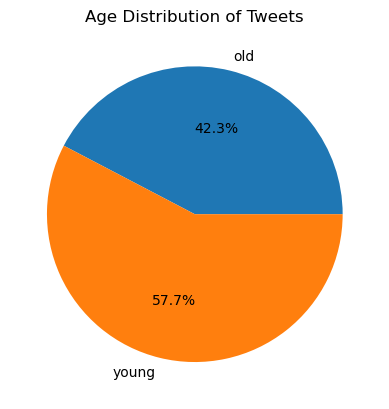

In [14]:
# Assuming 'df_joined' is your DataFrame and it's already grouped as mentioned
age_group_tweets = df_joined.groupby('age')['text'].count()

# Exclude the 'unknown' category
filtered_age_group_tweets = age_group_tweets[age_group_tweets.index.isin(['young', 'old'])]

# Plot a pie chart with only 'young' and 'old'
filtered_age_group_tweets.plot(kind='pie', autopct='%1.1f%%')
plt.title('Age Distribution of Tweets')
plt.ylabel('')  # This hides the 'Number of Tweets' label on the y-axis for a cleaner look
plt.show()





In [15]:
tweet['timestamp'] = pd.to_datetime(tweet['timestamp'])

month_counts = tweet.groupby(tweet['timestamp'].dt.month).count()
print(month_counts)


               id  timestamp    text
timestamp                           
4          100045     100045  100045
5          576367     576367  576367
6          923608     923608  923608


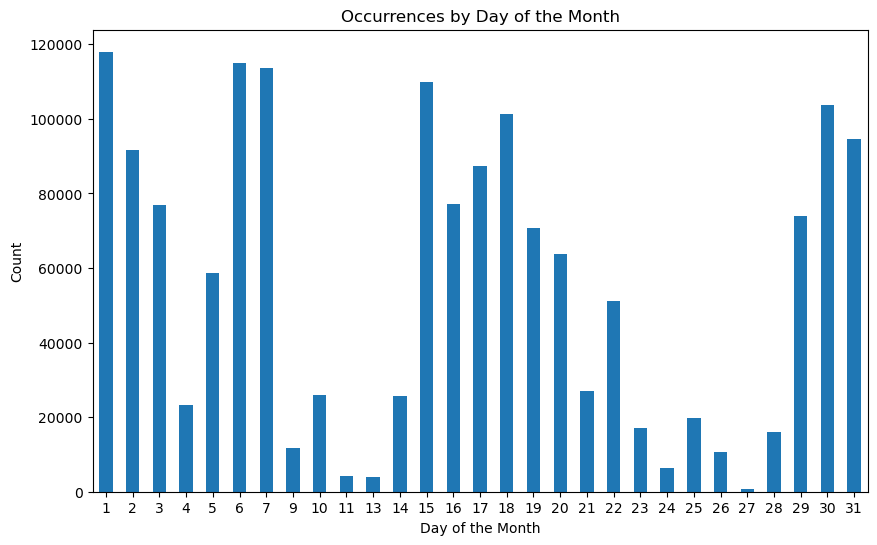

In [16]:
day_counts = tweet['timestamp'].dt.day.value_counts().sort_index()

plt.figure(figsize=(10, 6))
day_counts.plot(kind='bar')
plt.title('Occurrences by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep the x-axis labels from rotating
plt.show()


In [17]:
# Removing potential duplicates
df_unique = follower.drop_duplicates(subset=['id', 'following'])

# Count the number of followers for each user
followers_count = df_unique.groupby('id')['following'].count()

# Filter to show only users with more than 10 followers
more_than_10_followers = followers_count[followers_count > 10]

# Sort the results in descending order
sorted_followers_count = more_than_10_followers.sort_values(ascending=False)

print(sorted_followers_count)

id
89310999.0     14
722412147.0    14
787578650.0    14
765184555.0    13
501842757.0    13
               ..
509087154.0    11
510203303.0    11
510374277.0    11
510640151.0    11
859571139.0    11
Name: following, Length: 254, dtype: int64


## SENTIMENT ANALYSIS

In [18]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pearl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pearl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pearl\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pearl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
import re

def fix_contractions(doc):
    doc = re.sub(r'https?://\S+|www\.\S+', " ", doc)
    doc = re.sub(r"won't", "will not", doc)
    doc = re.sub(r"can't", "can not", doc)
    doc = re.sub(r"n't", " not", doc)
    doc = re.sub(r"'ll", " will", doc)
    doc = re.sub(r"'re", " are", doc)
    doc = re.sub(r"'ve", " have", doc)
    doc = re.sub(r"'m", " am", doc)
    doc = re.sub(r"'d", " would", doc)
    doc = re.sub(r"'s", "", doc)
    doc = re.sub(r"\n", " ", doc)
    doc = re.sub(r"[^a-zA-Z0-9 ]", " ", doc)
    return doc

tweet['New_text'] = tweet["text"].apply(fix_contractions)


In [20]:
tweet

,id,timestamp,text,New_text
0,0,2009-04-06 22:19:45,"@switchfoot http://twitpic.com/2y1zl - awww, t...",switchfoot awww that a bummer you shou...
1,303,2009-04-06 22:19:49,is upset that he can't update his facebook by ...,is upset that he can not update his facebook b...
2,548,2009-04-06 22:19:53,@kenichan i dived many times for the ball. man...,kenichan i dived many times for the ball man...
3,815,2009-04-06 22:19:57,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,824,2009-04-06 22:19:57,"@nationwideclass no, it's not behaving at all....",nationwideclass no it not behaving at all i...
...,...,...,...,...
1600015,285239913,2009-04-06 22:19:45,What is your favourite holiday destination?,What is your favourite holiday destination
1600016,285239913,2009-04-06 22:19:45,I love swimming in the sea,I love swimming in the sea
1600017,285239913,2009-04-06 22:19:45,Let's go together this year,Let go together this year
1600018,285239913,2009-04-06 22:19:45,How did you come here?,How did you come here


In [21]:
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    #Remove digits
    filtered_tokens = [token for token in filtered_tokens if not token.isdigit()]
    
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

In [22]:
# Assuming 'tweet' is your original DataFrame

# Shuffle the DataFrame rows with a set random seed for reproducibility

tweet_shuffled = tweet.sample(frac=1, random_state=42).reset_index(drop=True)

# Calculate the split point for a 90:10 split
split_point = int(len(tweet_shuffled) * 0.90)

# Split the DataFrame into 90% for the first part and 10% for the second part
df_95_percent = tweet_shuffled[:split_point]
df_10_percent = tweet_shuffled[split_point:]


In [23]:
# apply the function df
df_10_percent['NewQ'] = df_10_percent['New_text'].astype(str).apply(preprocess_text)
df_10_percent[['New_text','NewQ']]


C:\Users\pearl\AppData\Local\Temp\ipykernel_7968\2211241362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5_percent['NewQ'] = df_5_percent['New_text'].astype(str).apply(preprocess_text)


,New_text,NewQ
1440018,just got a present from apple,got present apple
1440019,martinsays i want the new album kinda of impo...,martinsays want new album kinda impossible
1440020,lizziegrubman have a great time in the hampto...,lizziegrubman great time hampton hope relaxati...
1440021,bunnydozer not lazy missy actually been cra...,bunnydozer lazy missy actually crazy busy open...
1440022,hangovers are no fun,hangover fun
...,...,...
1600015,this song middle change just does not want to ...,song middle change want born arghhhh
1600016,officialnjonas good luck with that,officialnjonas good luck
1600017,proudgamertweet i rather average 32370,proudgamertweet rather average
1600018,pickin up misstinayao waitin on sadittysash ...,pickin misstinayao waitin sadittysash hurry od...


In [24]:
from textblob import TextBlob


# Function to perform simplified sentiment analysis using TextBlob
def analyze_sentiment_textblob(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 1  # Positive sentiment
    elif polarity < 0:
        return -1  # Negative sentiment
    else:
        return 0  # Neutral sentiment

C:\Users\pearl\AppData\Local\Temp\ipykernel_7968\1702298568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5_percent['sentiment'] = df_5_percent['text'].apply(analyze_sentiment_textblob)


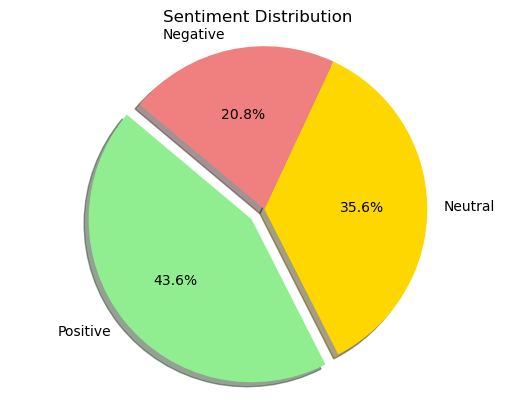

In [25]:
# Apply the sentiment analysis function to each row in the 'text' column
df_10_percent['sentiment'] = df_10_percent['text'].apply(analyze_sentiment_textblob)

# Count the occurrences of each sentiment
sentiment_counts = df_10_percent['sentiment'].value_counts(normalize=True) * 100

# Prepare data for pie chart
labels = ['Positive', 'Neutral', 'Negative']
sizes = [sentiment_counts.get(1, 0), sentiment_counts.get(0, 0), sentiment_counts.get(-1, 0)]
colors = ['lightgreen', 'gold', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice (Positive)

# Plot pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sentiment Distribution')
plt.show()

In [26]:
df_10_percent

,id,timestamp,text,New_text,NewQ,sentiment
1440018,494889316,2009-05-29 11:29:28,just got a present from apple,just got a present from apple,got present apple,0
1440019,763672444,2009-06-18 18:36:36,@martinsays i want the new album kinda of impo...,martinsays i want the new album kinda of impo...,martinsays want new album kinda impossible,-1
1440020,495615412,2009-05-29 12:42:18,@lizziegrubman have a great time in the hampto...,lizziegrubman have a great time in the hampto...,lizziegrubman great time hampton hope relaxati...,1
1440021,529771517,2009-06-01 17:06:00,"@bunnydozer not lazy, missy. actually been cra...",bunnydozer not lazy missy actually been cra...,bunnydozer lazy missy actually crazy busy open...,-1
1440022,587027383,2009-06-06 08:10:58,hangovers are no fun,hangovers are no fun,hangover fun,-1
...,...,...,...,...,...,...
1600015,517551621,2009-05-31 16:57:39,this song's middle change just doesn't want to...,this song middle change just does not want to ...,song middle change want born arghhhh,0
1600016,589219415,2009-06-06 12:14:24,@officialnjonas good luck with that,officialnjonas good luck with that,officialnjonas good luck,1
1600017,367828985,2009-05-18 06:26:21,@proudgamertweet i rather average 32370,proudgamertweet i rather average 32370,proudgamertweet rather average,-1
1600018,778969805,2009-06-19 18:06:46,pickin up @misstinayao waitin on @sadittysash ...,pickin up misstinayao waitin on sadittysash ...,pickin misstinayao waitin sadittysash hurry od...,0


In [27]:
new_df_merged = pd.merge(df_10_percent, user, on="id")

In [28]:
# Drop 'text' and 'New_text' columns from the DataFrame
new_df_merged = new_df_merged.drop(columns=['text', 'New_text'])


In [29]:
new_df_merged

,id,timestamp,NewQ,sentiment,user,age
0,494889316,2009-05-29 11:29:28,got present apple,0,MattManM7,unknown
1,763672444,2009-06-18 18:36:36,martinsays want new album kinda impossible,-1,barbshadow,unknown
2,495615412,2009-05-29 12:42:18,lizziegrubman great time hampton hope relaxati...,1,mscommuncations,unknown
3,529771517,2009-06-01 17:06:00,bunnydozer lazy missy actually crazy busy open...,-1,KellyShibari,unknown
4,587027383,2009-06-06 08:10:58,hangover fun,-1,nicoledufkis,unknown
...,...,...,...,...,...,...
159997,517551621,2009-05-31 16:57:39,song middle change want born arghhhh,0,lutheasalom,unknown
159998,589219415,2009-06-06 12:14:24,officialnjonas good luck,1,beeluz,unknown
159999,367828985,2009-05-18 06:26:21,proudgamertweet rather average,-1,lordmuttley,unknown
160000,778969805,2009-06-19 18:06:46,pickin misstinayao waitin sadittysash hurry od...,0,MizSadittyFancy,unknown


In [30]:
#age distribution
age_distributionn = new_df_merged['age'].value_counts()
print(age_distributionn)

unknown    156787
young        1850
old          1365
Name: age, dtype: int64


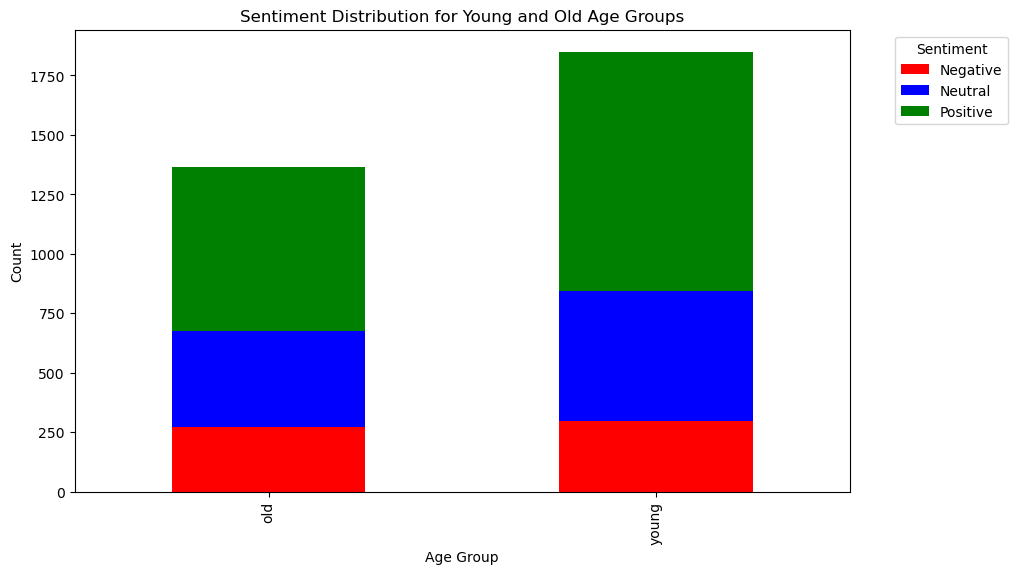

In [39]:

# Step 1: Filter out rows where 'age' is 'unknown'
filtered_df = new_df_merged[new_df_merged['age'] != 'unknown']

# Step 2: Group by 'age' and count each 'sentiment', then unstack for plotting
sentiment_counts = filtered_df.groupby('age')['sentiment'].value_counts().unstack()

# Plot the sentiment counts
ax = sentiment_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'blue', 'green'])

# Setting the labels and title for the plot
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Sentiment Distribution for Young and Old Age Groups')

# Customizing the legend
legend_labels = ['Negative', 'Neutral', 'Positive']  # Ensure these labels match your data
plt.legend(legend_labels, title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()


In [40]:
dfg = new_df_merged.copy()

In [41]:
old_filter = dfg[dfg['age'] == 'old']['NewQ']

In [45]:
old_filter = old_filter.apply(lambda x: x.split())


In [47]:
import gensim
from gensim import corpora

# Create a dictionary from the processed tokens
dictionary = corpora.Dictionary(old_filter)

# Create a corpus from the dictionary
corpus = [dictionary.doc2bow(text) for text in old_filter]

In [49]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=5,  
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

# Print the topics found by the LDA model
for idx, topic in lda_model.print_topics(num_words=5):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.028*"painting" + 0.022*"see" + 0.017*"would" + 0.013*"gon" + 0.010*"need"
Topic: 1 
Words: 0.031*"exercise" + 0.018*"painting" + 0.016*"tonight" + 0.011*"oh" + 0.009*"baby"
Topic: 2 
Words: 0.043*"travel" + 0.019*"friend" + 0.012*"want" + 0.012*"night" + 0.011*"hour"
Topic: 3 
Words: 0.031*"like" + 0.030*"great" + 0.022*"quot" + 0.012*"way" + 0.010*"getting"
Topic: 4 
Words: 0.126*"family" + 0.027*"day" + 0.019*"amp" + 0.015*"time" + 0.015*"good"


#### Summary of Interpretation
Each topic in your model captures a different aspect of the discussions present in your dataset:

Topic 0 (Artistic Endeavors): Focuses on painting and artistic expression.
Topic 1 (Casual Activities and Socialization): Involves talking about daily leisure activities and plans.
Topic 2 (Travel and Friendship): Centers on travel and experiences with friends.
Topic 3 (Positive Sentiments and Quality): Reflects positive sentiments and discussions on quality experiences.
Topic 4 (Family and Time): Relates to family and significant times.

In [50]:
young_filter = dfg[dfg['age'] == 'young']['NewQ']

In [52]:
young_filter = young_filter.apply(lambda x: x.split())

In [54]:
# Create a dictionary from the processed tokens
dictionary2 = corpora.Dictionary(young_filter)

# Create a corpus from the dictionary
corpus2 = [dictionary2.doc2bow(text) for text in young_filter]

In [55]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus2,
                                           id2word=dictionary2,
                                           num_topics=5,  
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

# Print the topics found by the LDA model
for idx, topic in lda_model.print_topics(num_words=5):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.020*"musicmonday" + 0.019*"could" + 0.014*"sad" + 0.011*"gaming" + 0.008*"country"
Topic: 1 
Words: 0.042*"quot" + 0.022*"u" + 0.021*"got" + 0.019*"amp" + 0.015*"musical"
Topic: 2 
Words: 0.016*"na" + 0.016*"night" + 0.016*"still" + 0.014*"last" + 0.010*"thanks"
Topic: 3 
Words: 0.017*"work" + 0.016*"come" + 0.014*"back" + 0.014*"watch" + 0.012*"live"
Topic: 4 
Words: 0.112*"music" + 0.047*"movie" + 0.023*"love" + 0.015*"new" + 0.015*"listening"


#####  Topic 0: Emotional and Cultural Expressions, Topic 1: Quotations and Entertainment , Topic 2: Reflective and Appreciative Moments ,Topic 3: Activities and Daily Life ,Topic 4: Music and Film

In [56]:
dfg


,id,timestamp,NewQ,sentiment,user,age
0,494889316,2009-05-29 11:29:28,got present apple,0,MattManM7,unknown
1,763672444,2009-06-18 18:36:36,martinsays want new album kinda impossible,-1,barbshadow,unknown
2,495615412,2009-05-29 12:42:18,lizziegrubman great time hampton hope relaxati...,1,mscommuncations,unknown
3,529771517,2009-06-01 17:06:00,bunnydozer lazy missy actually crazy busy open...,-1,KellyShibari,unknown
4,587027383,2009-06-06 08:10:58,hangover fun,-1,nicoledufkis,unknown
...,...,...,...,...,...,...
159997,517551621,2009-05-31 16:57:39,song middle change want born arghhhh,0,lutheasalom,unknown
159998,589219415,2009-06-06 12:14:24,officialnjonas good luck,1,beeluz,unknown
159999,367828985,2009-05-18 06:26:21,proudgamertweet rather average,-1,lordmuttley,unknown
160000,778969805,2009-06-19 18:06:46,pickin misstinayao waitin sadittysash hurry od...,0,MizSadittyFancy,unknown


In [57]:
young_filter

235       [afinefrenzy, would, never, heard, b4, week, a...
262          [deathandtaxes, musicmonday, great, listening]
331       [backdraft9213, sleeping, filming, two, segmen...
363       [musiciceangel, miss, watching, crazy, movie, ...
380       [like, said, might, show, tonight, andrew, agr...
                                ...                        
159132    [need, new, copy, illusionist, mine, messed, d...
159262                                     [musical, today]
159360    [musical, laura, aww, would, feel, lost, witho...
159685               [discovered, new, musicfavorite, mine]
159848    [omg, gaming, event, much, fun, work, ahhh, re...
Name: NewQ, Length: 1850, dtype: object

### Using N-gram

In [62]:
import pandas as pd
from nltk import ngrams, FreqDist
import matplotlib.pyplot as plt
from collections import Counter

def get_freq_dist(tokenized_texts, number_of_ngrams):
    # Step 1: Concatenate all words in the tokenized texts into a single list
    all_words = [word for text in tokenized_texts for word in text]
    
    # Step 2: Generate n-grams
    generated_ngrams = list(ngrams(all_words, number_of_ngrams))
    
    # Step 3: Create a frequency distribution of the n-grams
    ngram_fd = FreqDist(generated_ngrams).most_common(40)
    
    # Step 4: Sort values by highest frequency
    ngram_sorted = {k: v for k, v in sorted(ngram_fd, key=lambda item: item[1], reverse=True)}
    
    # Step 5: Join n-gram tokens with '_' and maintain sorting
    ngram_joined = {'_'.join(k): v for k, v in sorted(ngram_fd, key=lambda item: item[1], reverse=True)}
    
    # Step 6: Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    
    # Step 7: Plot the frequency distribution
    plt.figure(figsize=(10, 10))
    ax = ngram_freqdist.plot(kind="barh")
    plt.xlabel('Frequency')
    plt.ylabel('N-grams')
    plt.title(f'Top 40 {number_of_ngrams}-grams in Text Data')
    
    return ax


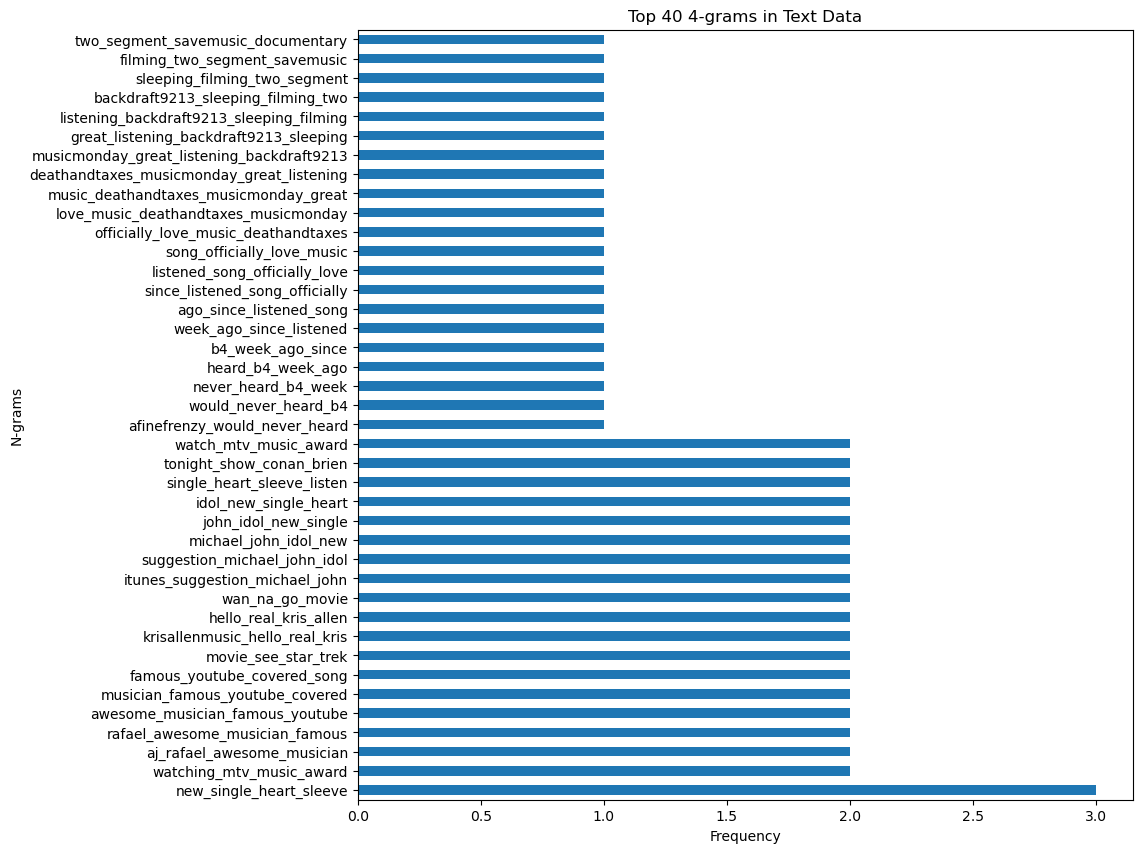

In [63]:
ax = get_freq_dist(young_filter, 4)
plt.show()

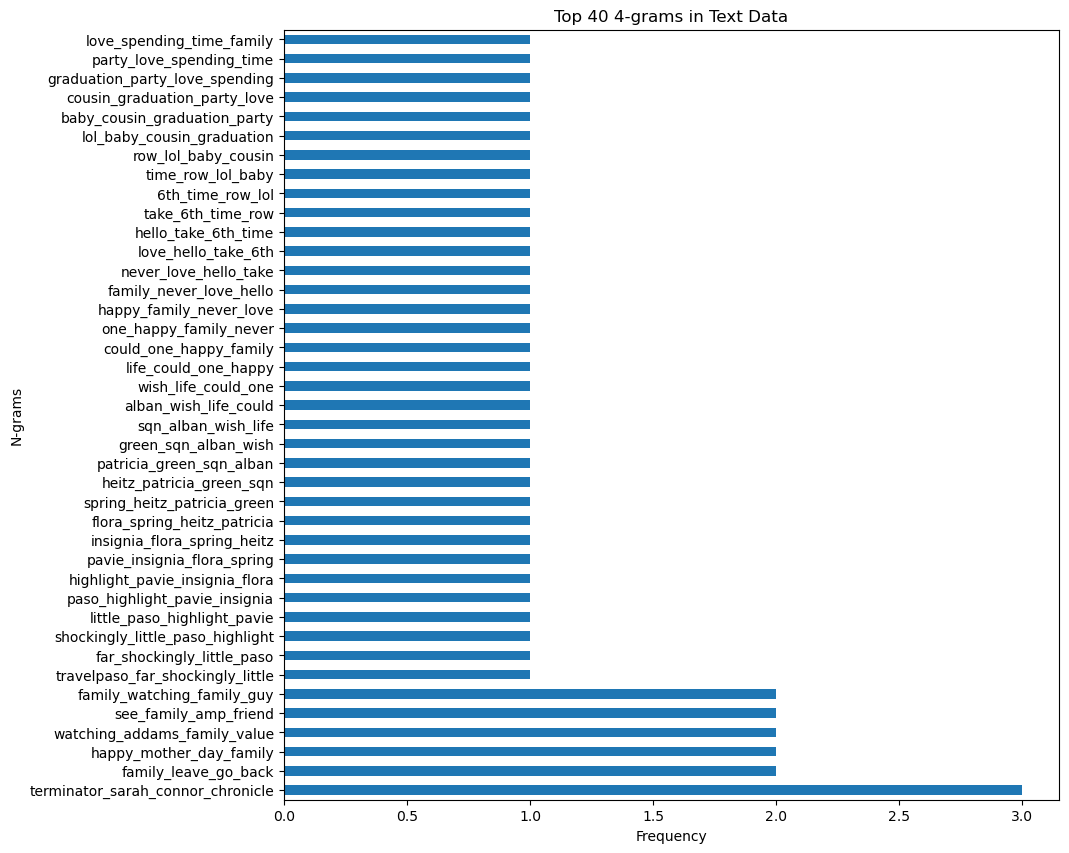

In [64]:
ax = get_freq_dist(old_filter, 4)
plt.show()